In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dataset=pd.read_csv(r"C:\Users\shubham\Desktop\DeepLearning\musk_csv.csv")
#Dropping ID Column
dataset=dataset.drop(['ID'], axis=1)

# Finding the duplicates values in the dataset
duplicate_rows= dataset[dataset.duplicated()]
print("No. of Duplicate rows", duplicate_rows.shape)

# Finding the null values in the dataset
print("Null Values in Churn Data:-",dataset.isnull().any().any())


No. of Duplicate rows (0, 169)
Null Values in Churn Data:- False


In [3]:
from sklearn.preprocessing import LabelEncoder
lableEnc=LabelEncoder()
dataset["molecule_name"]=lableEnc.fit_transform(dataset["molecule_name"])

In [4]:
new_data=dataset.drop(['conformation_name'], axis=1)

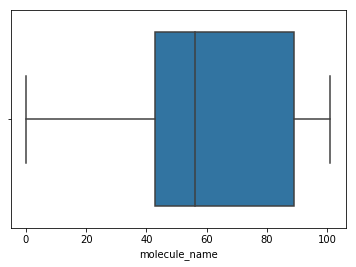

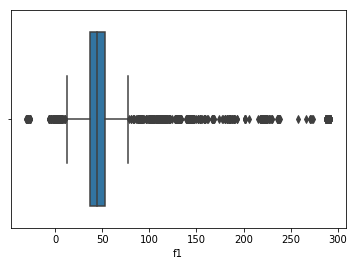

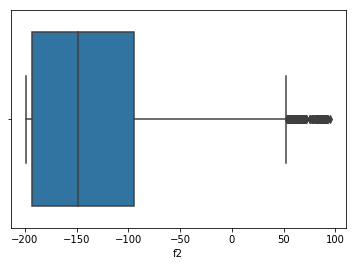

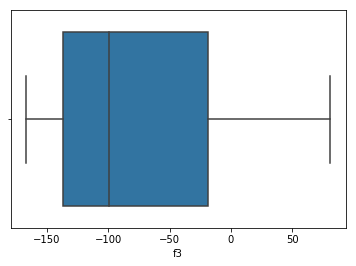

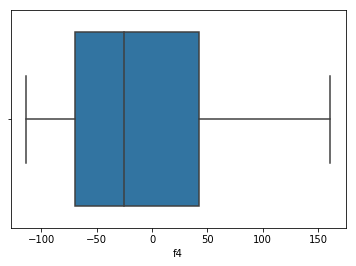

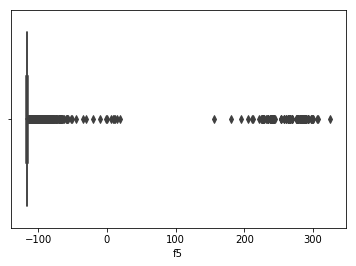

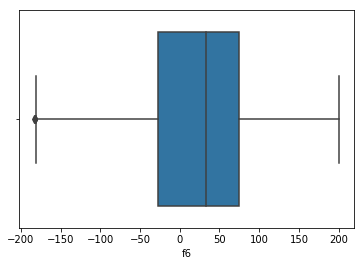

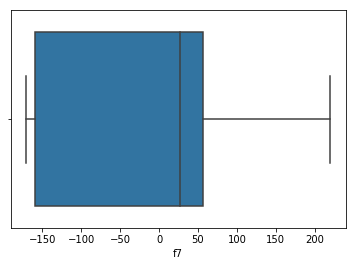

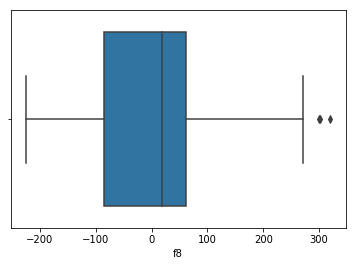

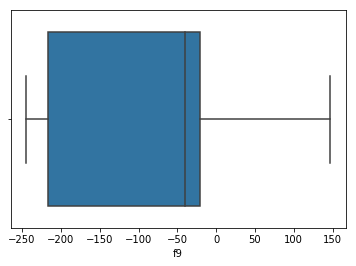

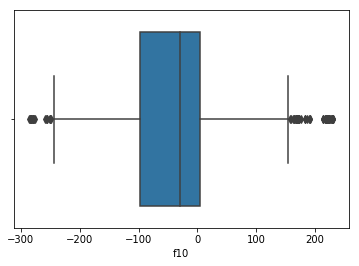

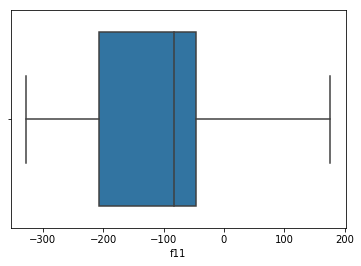

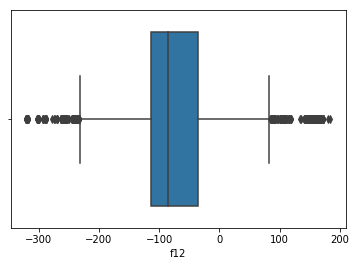

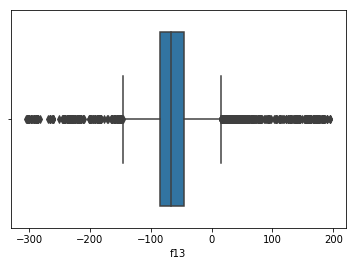

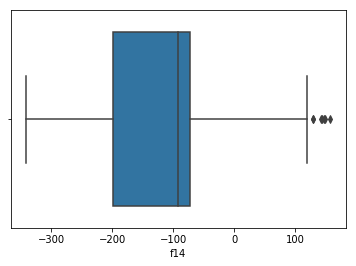

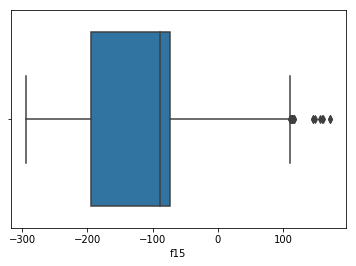

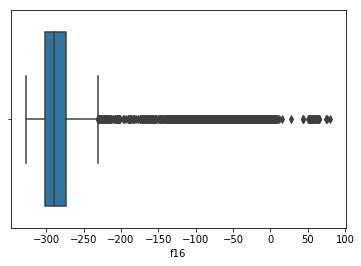

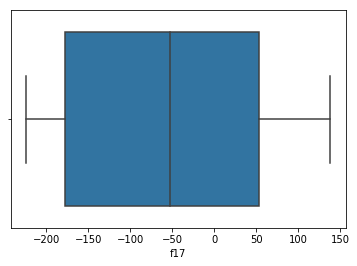

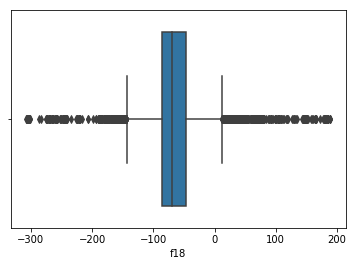

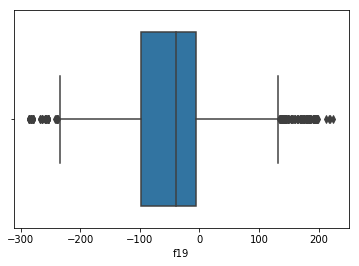

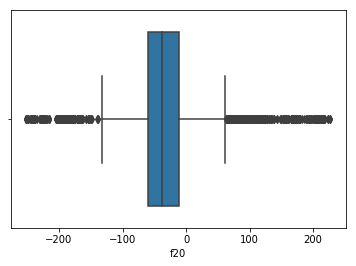

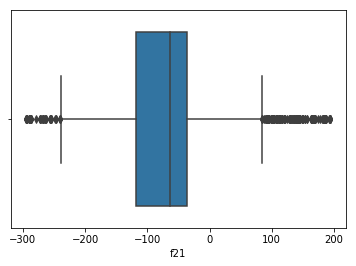

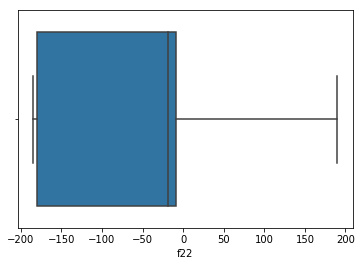

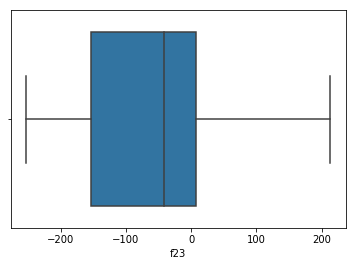

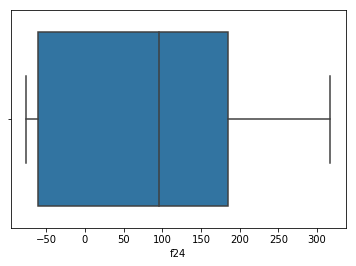

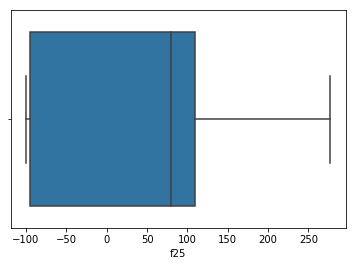

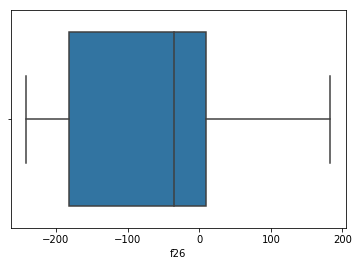

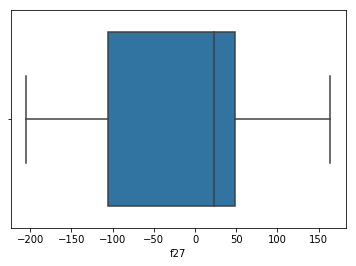

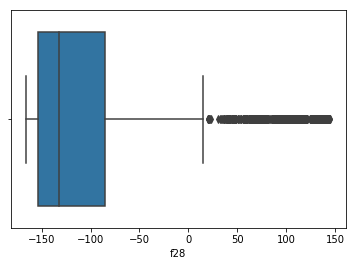

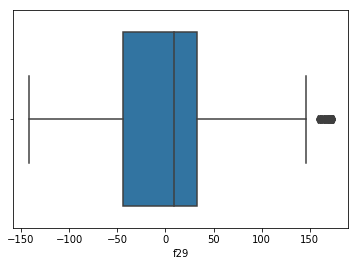

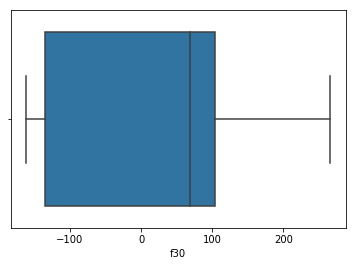

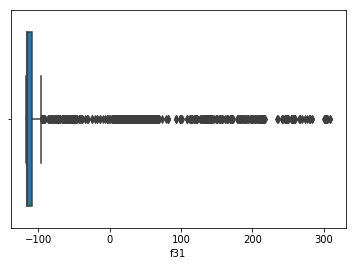

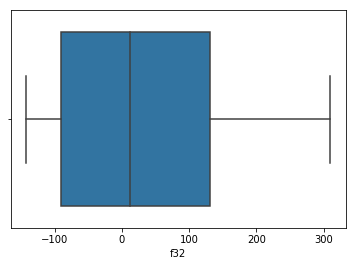

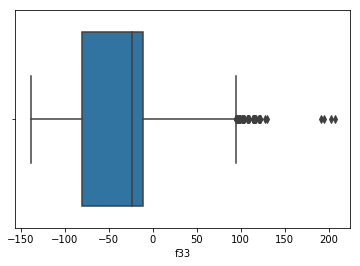

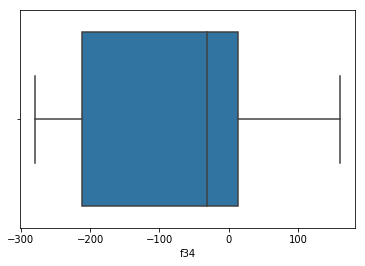

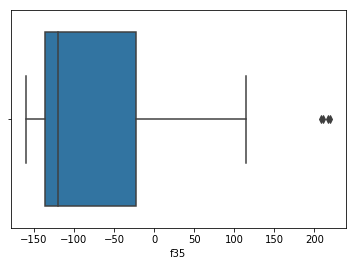

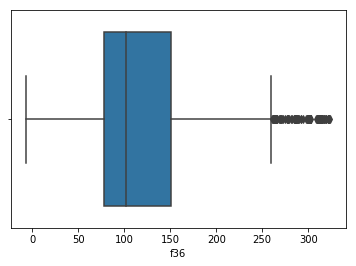

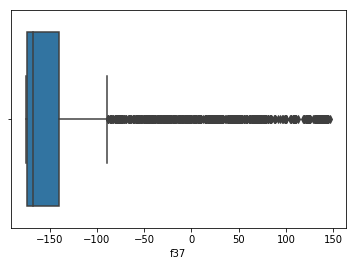

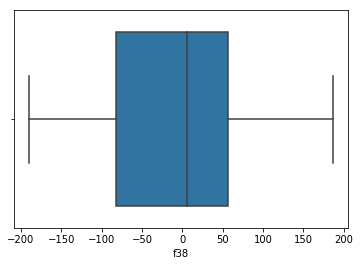

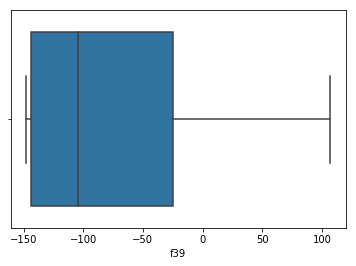

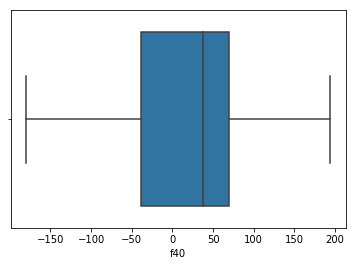

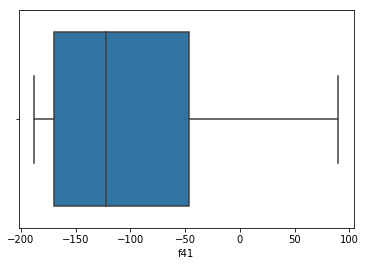

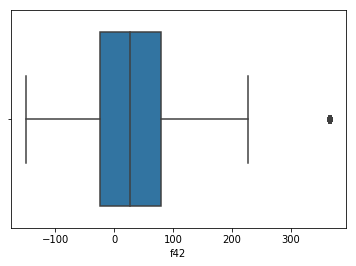

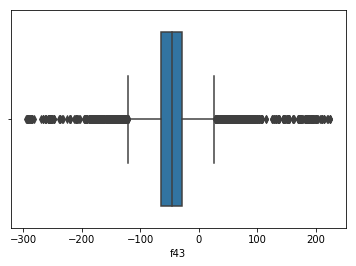

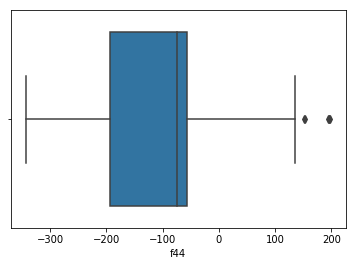

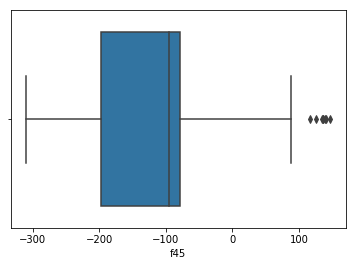

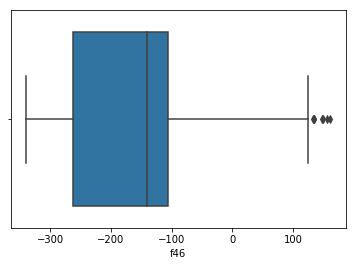

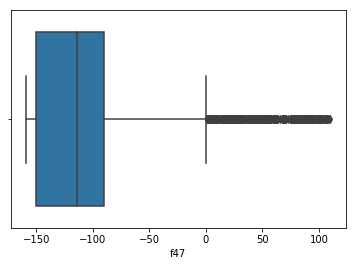

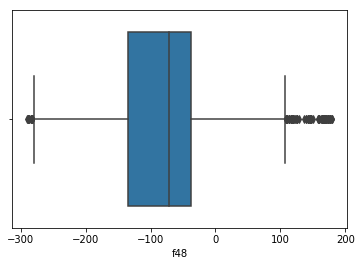

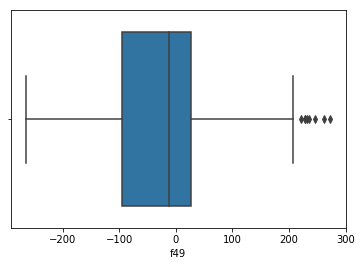

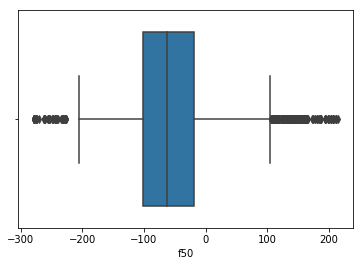

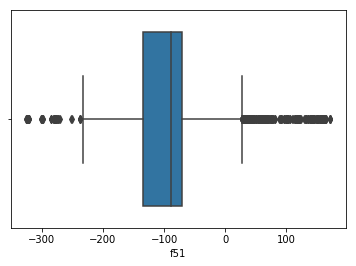

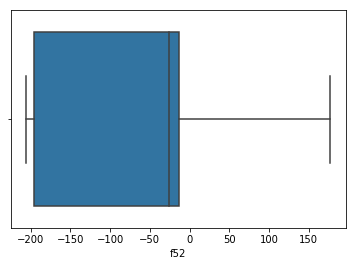

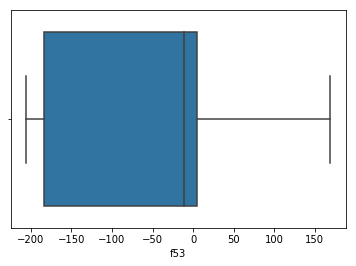

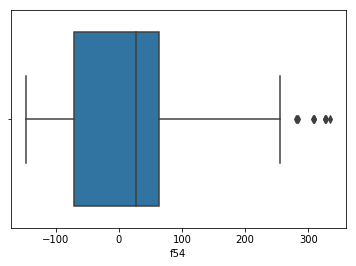

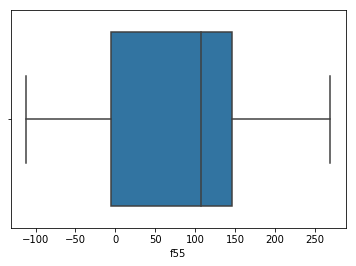

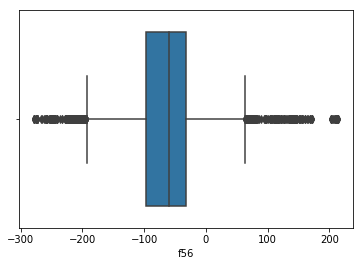

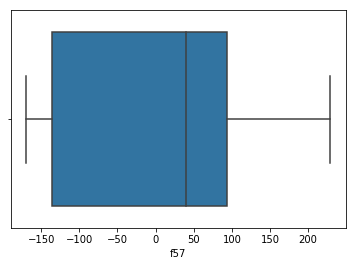

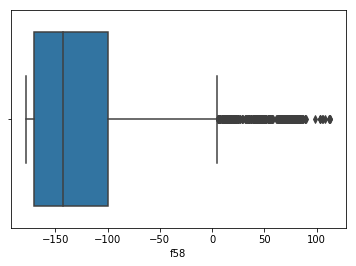

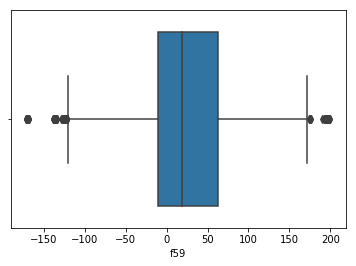

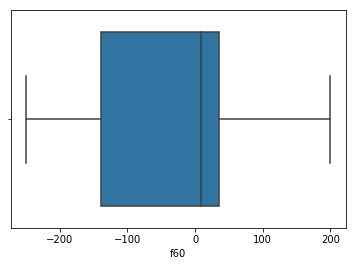

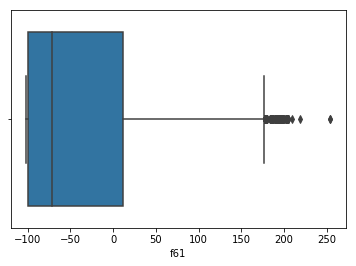

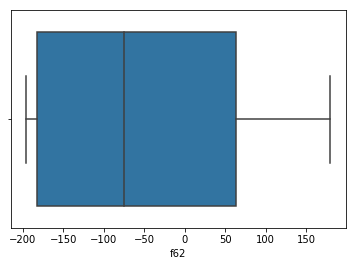

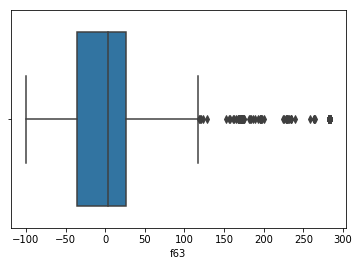

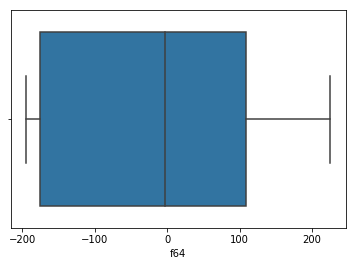

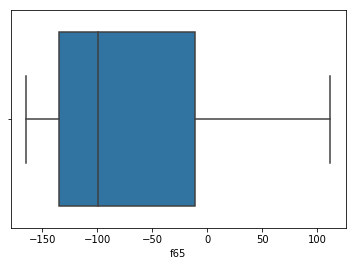

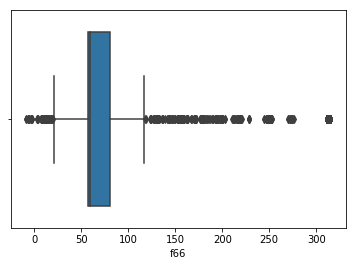

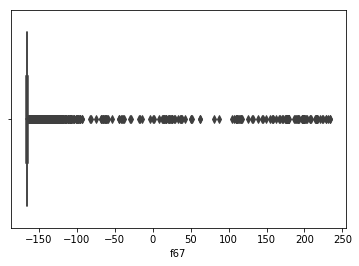

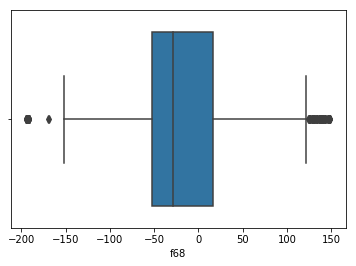

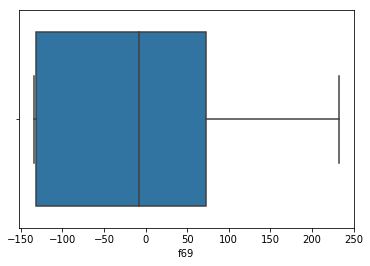

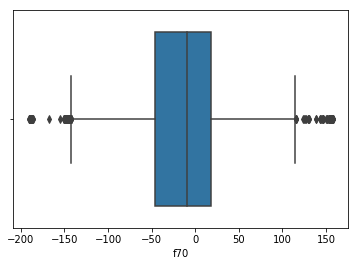

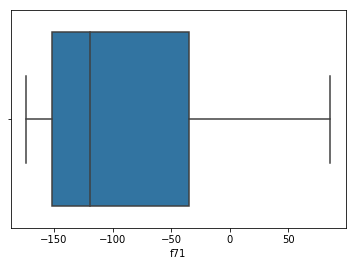

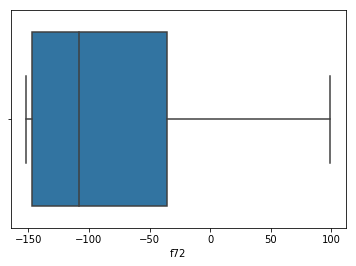

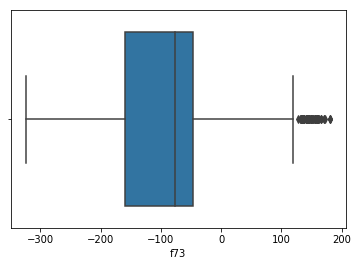

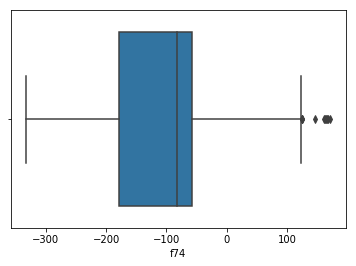

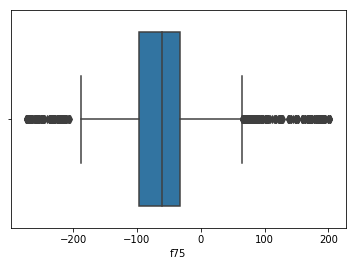

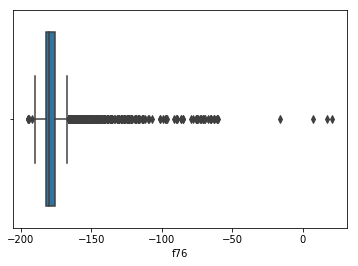

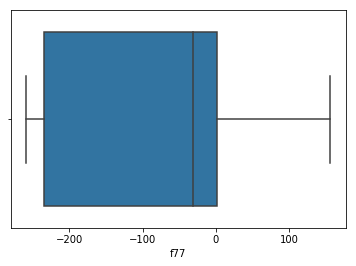

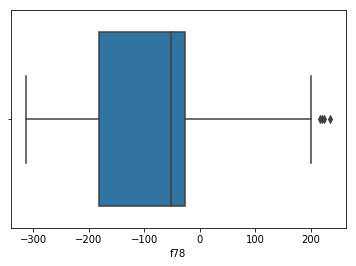

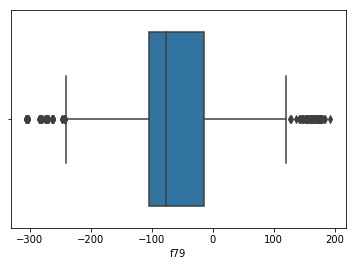

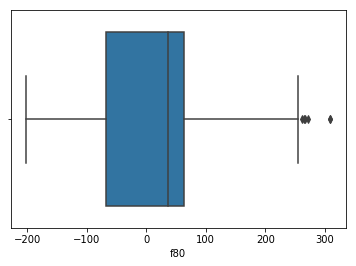

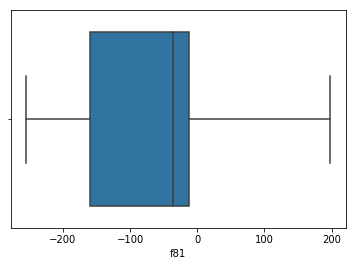

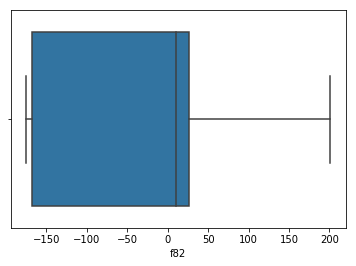

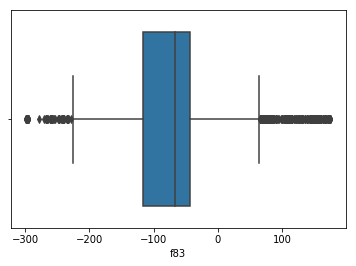

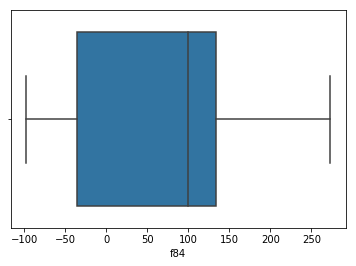

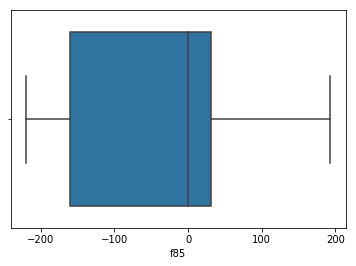

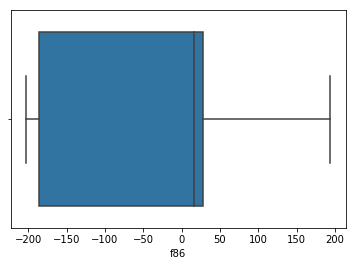

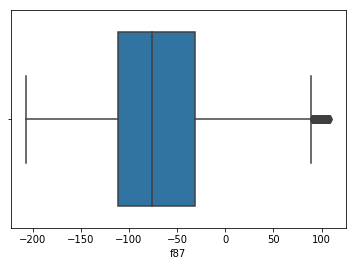

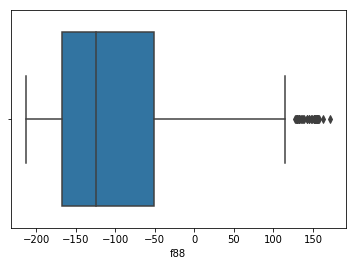

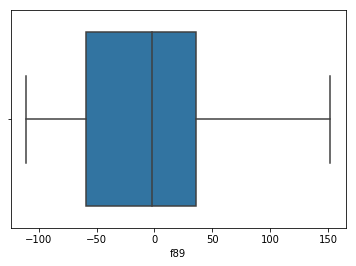

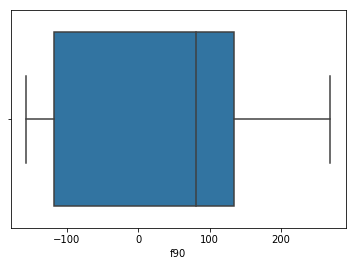

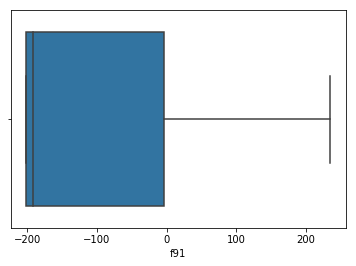

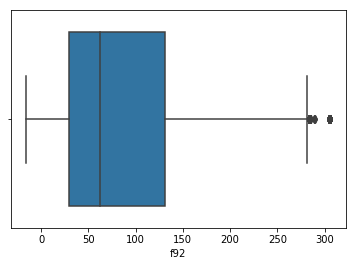

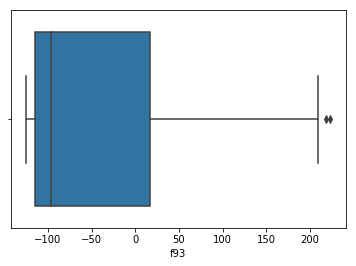

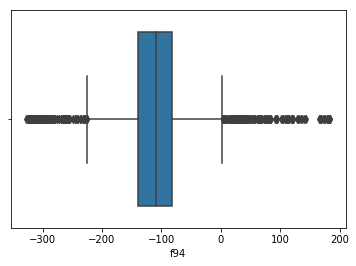

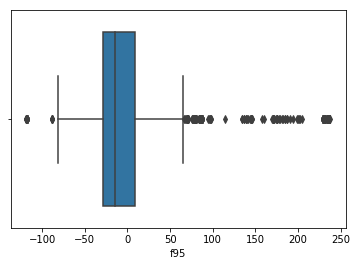

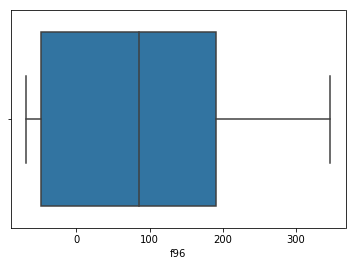

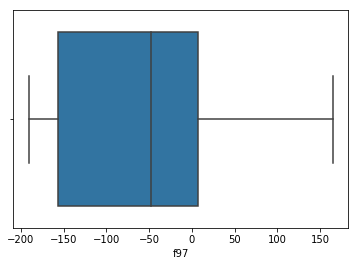

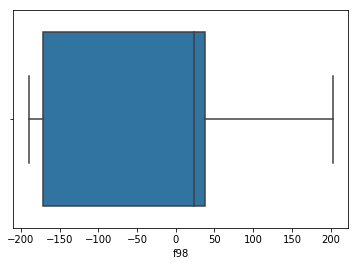

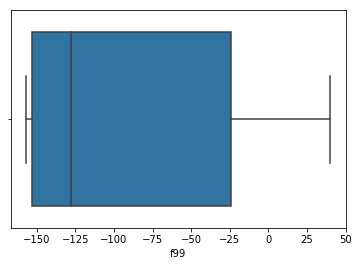

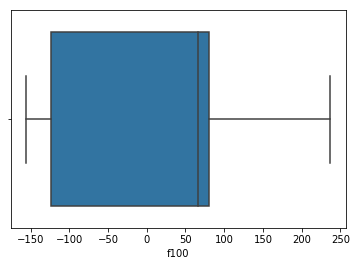

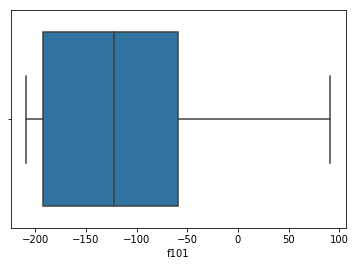

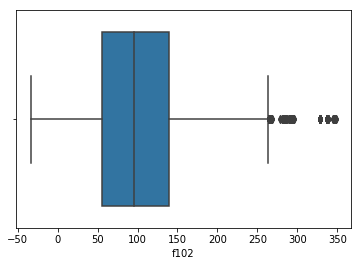

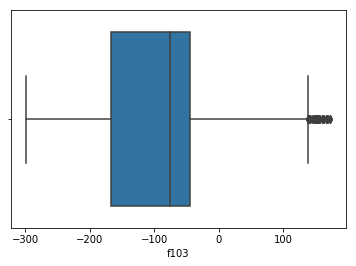

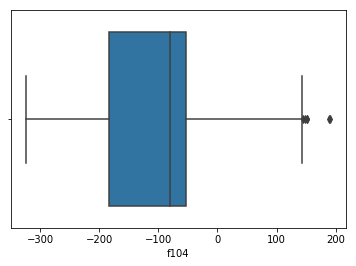

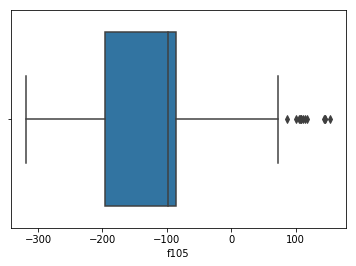

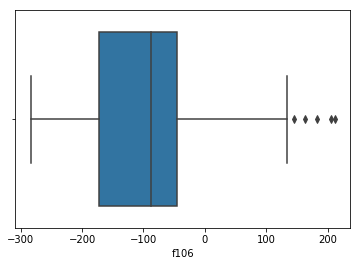

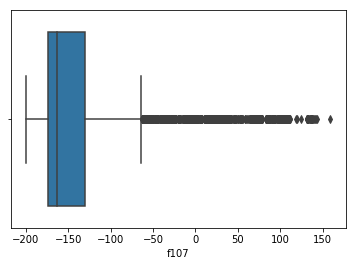

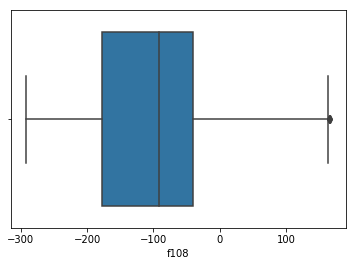

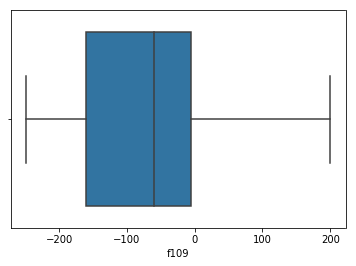

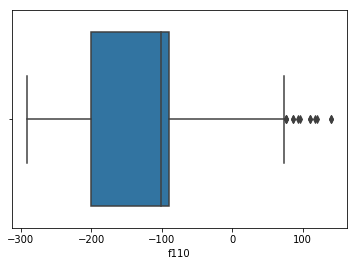

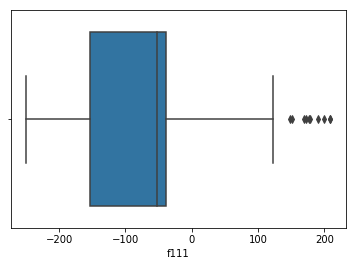

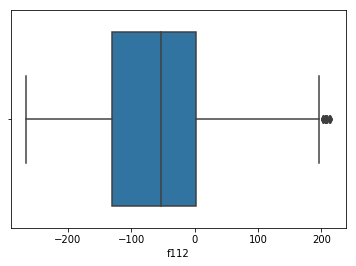

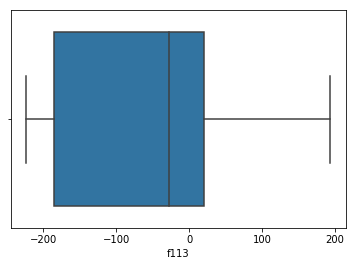

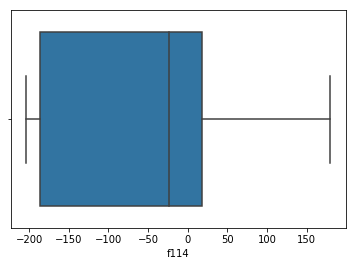

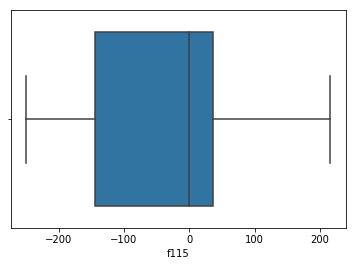

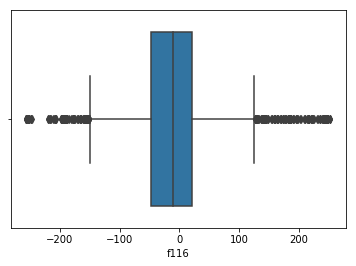

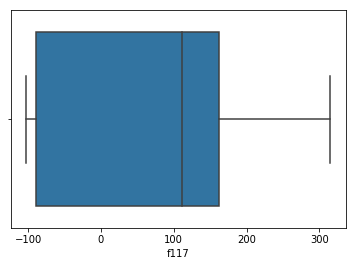

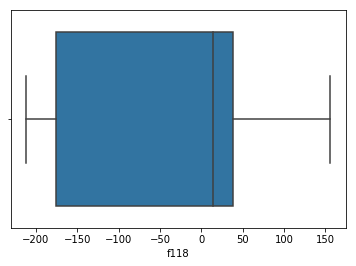

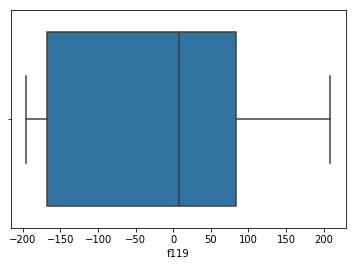

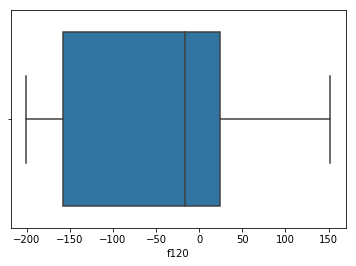

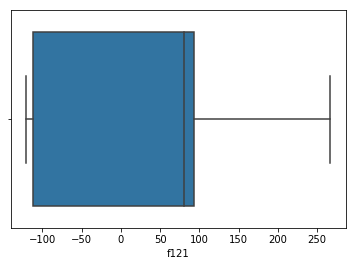

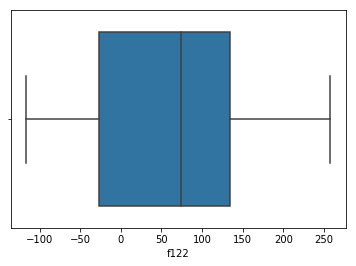

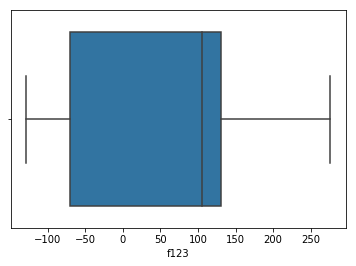

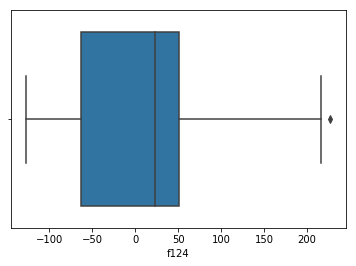

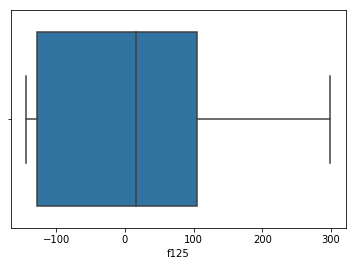

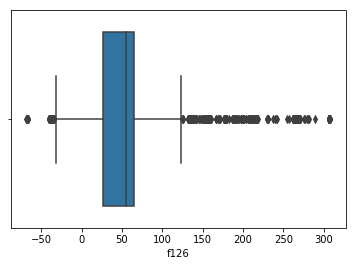

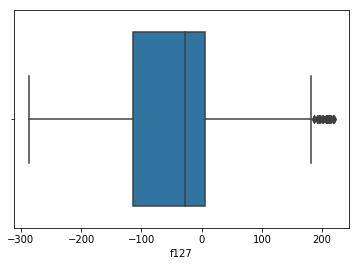

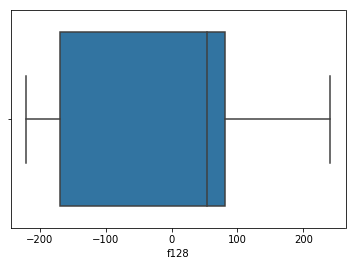

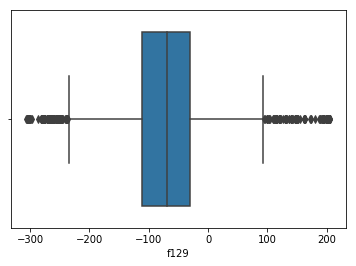

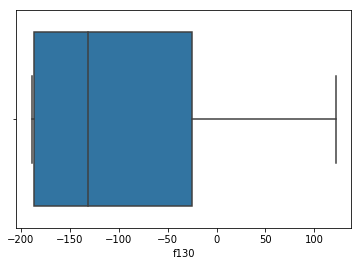

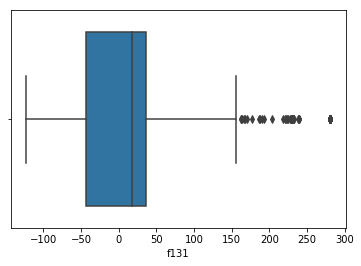

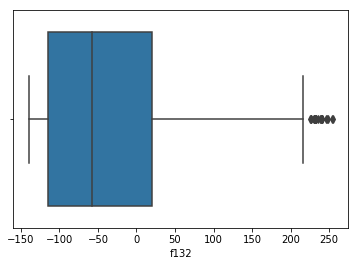

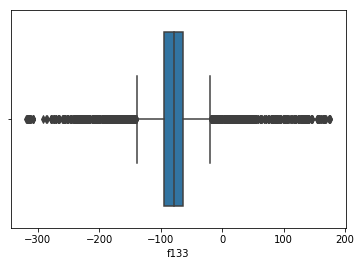

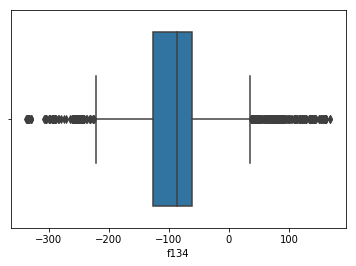

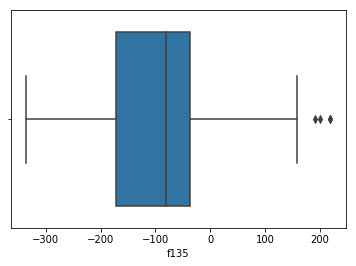

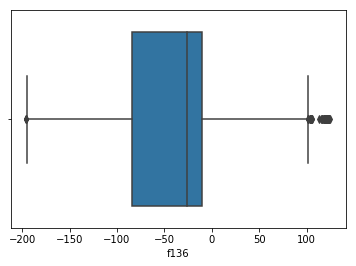

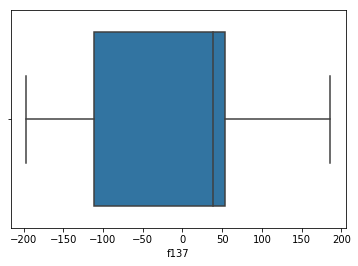

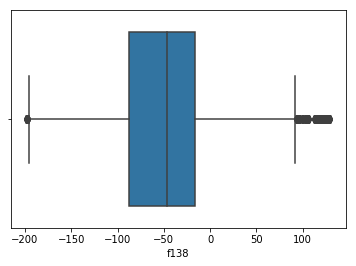

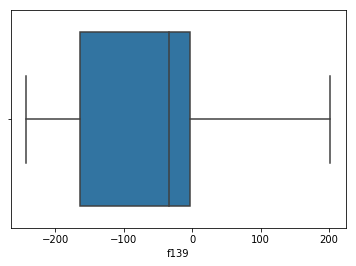

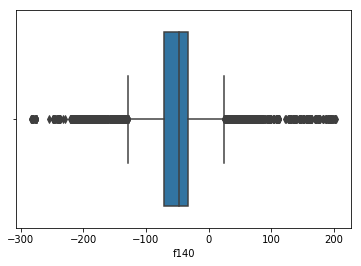

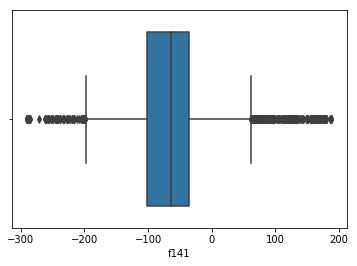

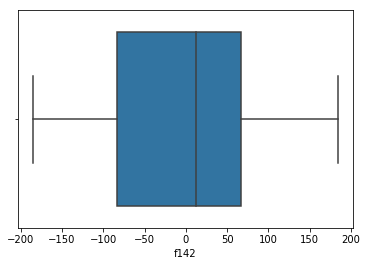

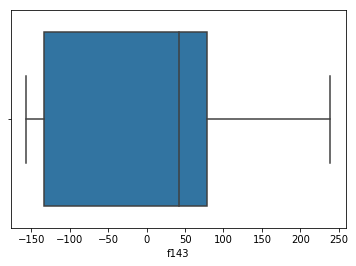

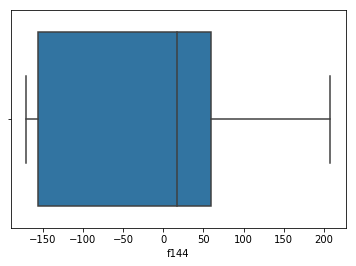

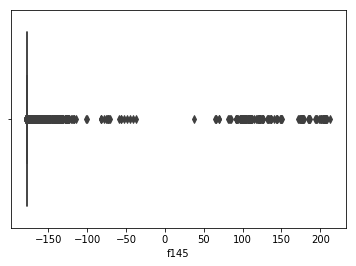

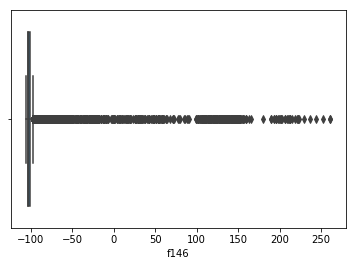

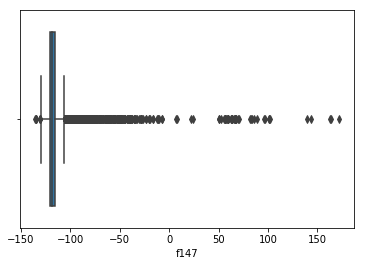

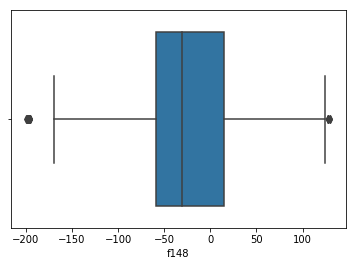

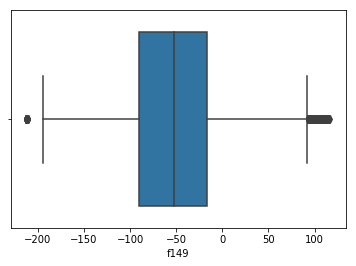

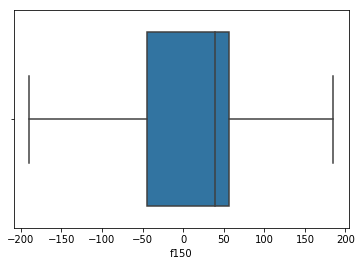

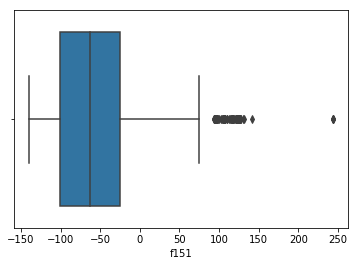

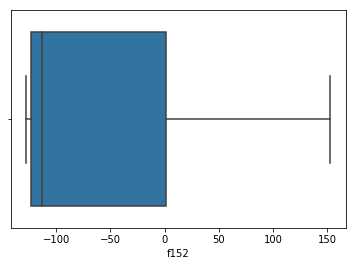

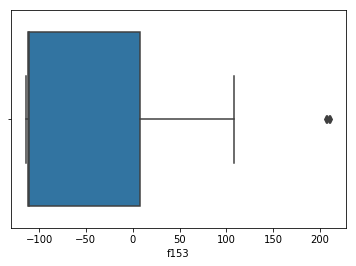

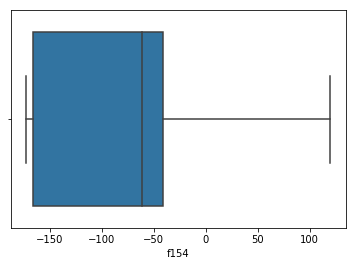

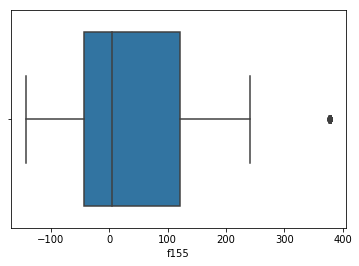

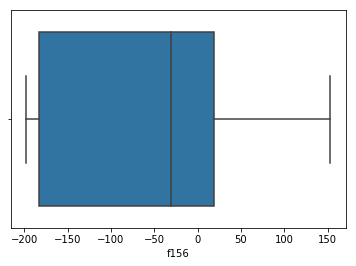

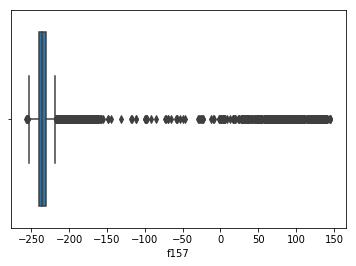

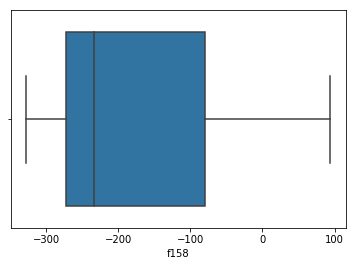

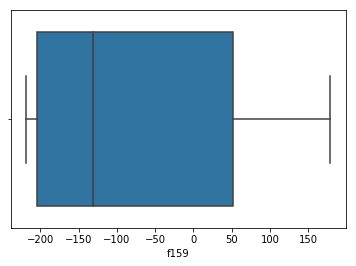

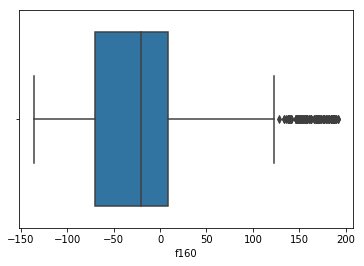

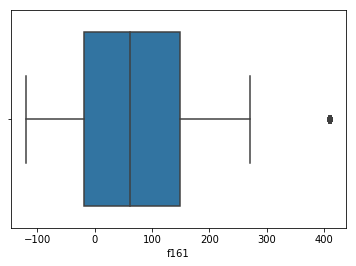

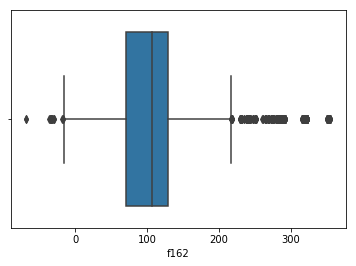

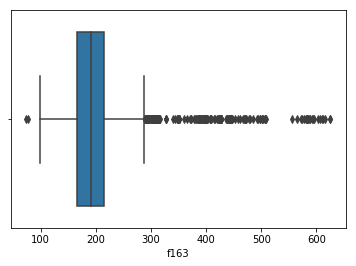

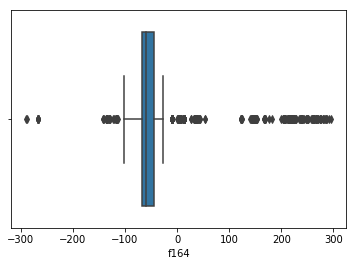

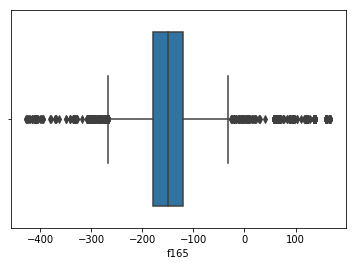

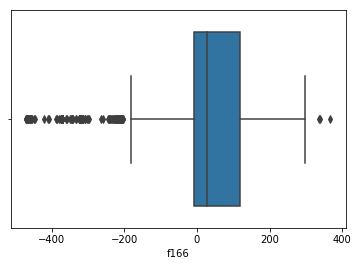

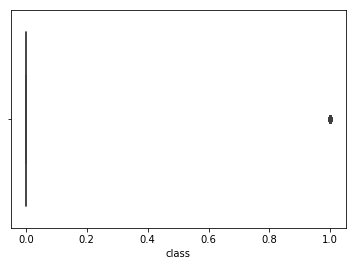

In [5]:
# Outlier Analysis
for column in new_data.columns:
    sns.boxplot(x=new_data[column])
    plt.show()

# Removing Outliers

In [6]:

from scipy import stats
z = np.abs(stats.zscore(new_data))
print(z)

[[2.22097135 0.24312408 0.12255207 ... 0.50333227 0.5762445  2.34258595]
 [2.22097135 0.33702966 0.7584422  ... 0.18759789 0.39560282 2.34258595]
 [2.22097135 0.24312408 0.82451677 ... 0.06919749 0.02943645 2.34258595]
 ...
 [1.49457534 0.28068632 0.18862664 ... 0.08235309 0.50760562 0.42687868]
 [1.49457534 0.1492185  0.0206095  ... 0.45070987 0.79939012 0.42687868]
 [1.49457534 0.1492185  0.03162193 ... 0.46386547 0.8100161  0.42687868]]


In [7]:
threshold = 3
print( np.where(z < 3 ))

(array([   0,    0,    0, ..., 6597, 6597, 6597], dtype=int64), array([  0,   1,   2, ..., 165, 166, 167], dtype=int64))


In [8]:
new_data = new_data[(z < 3).all(axis=1) | (z > 3).all(axis=1) ]

In [9]:
new_data.shape

(3456, 168)

# Deep Learning Concept Implementation

In [10]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [11]:
properties = list(new_data.columns.values)
properties.remove('class')

features = new_data[properties]
target = new_data['class']

Data Splitting

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# Model Training

In [53]:
from keras.models import Sequential
from keras.layers import Dense
# Initialising the RNN
# predicting a continuous outcome, regression model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(167,)),
    keras.layers.Dense(8, activation=tf.nn.sigmoid),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(optimizer='Adam',
              loss='mse',
              metrics=['accuracy'])

# Fitting the RNN to the Trainign set
history = model.fit(X_train, y_train, epochs=32, batch_size=5, validation_data=(X_val, y_val))


Train on 2211 samples, validate on 553 samples
Epoch 1/32
2211/2211 [==============================] - 2s 812us/sample - loss: 0.1933 - acc: 0.7300 - val_loss: 0.1583 - val_acc: 0.7722
Epoch 2/32
2211/2211 [==============================] - 1s 461us/sample - loss: 0.1679 - acc: 0.7300 - val_loss: 0.1448 - val_acc: 0.7722
Epoch 3/32
2211/2211 [==============================] - 1s 480us/sample - loss: 0.1498 - acc: 0.7490 - val_loss: 0.1293 - val_acc: 0.8499
Epoch 4/32
2211/2211 [==============================] - 1s 504us/sample - loss: 0.1417 - acc: 0.8236 - val_loss: 0.1204 - val_acc: 0.8481
Epoch 5/32
2211/2211 [==============================] - 1s 475us/sample - loss: 0.1359 - acc: 0.7892 - val_loss: 0.1293 - val_acc: 0.7975
Epoch 6/32
2211/2211 [==============================] - 1s 474us/sample - loss: 0.1214 - acc: 0.8399 - val_loss: 0.1122 - val_acc: 0.8590
Epoch 7/32
2211/2211 [==============================] - 1s 608us/sample - loss: 0.1175 - acc: 0.8498 - val_loss: 0.1170 - val

# Accuracy Graph

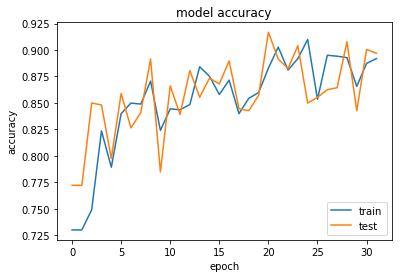

In [54]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Loss Graph

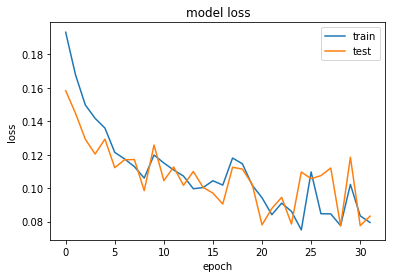

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model Testing

In [56]:
predicted_vals = model.predict(X_test)
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, predicted_vals))
print("RMSE is:- ",rmse)

RMSE is:-  0.2885387652688716


In [57]:
from sklearn import metrics
print ("Accuracy Score is:- ",metrics.accuracy_score(y_test, predicted_vals.round()))

Accuracy Score is:-  0.8858381502890174


In [58]:
print("F1-Score is:- ", metrics.f1_score(y_test,predicted_vals.round()))

F1-Score is:-  0.740983606557377


In [59]:
print("Precision-Score is:- ", metrics.precision_score(y_test,predicted_vals.round()))

Precision-Score is:-  0.9186991869918699


In [60]:
print("Recall-Score is:- ", metrics.recall_score(y_test,predicted_vals.round()))

Recall-Score is:-  0.6208791208791209


In [61]:
from sklearn.model_selection import StratifiedKFold

In [62]:
from sklearn.metrics import classification_report
print(' Classification Report')
print(classification_report(y_test,predicted_vals.round()))

 Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       510
           1       0.92      0.62      0.74       182

   micro avg       0.89      0.89      0.89       692
   macro avg       0.90      0.80      0.83       692
weighted avg       0.89      0.89      0.88       692



In [63]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test,predicted_vals.round()) 
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[500  10]
 [ 69 113]]
